In [1]:
# importing necessary packages
import numpy as np
import cv2
import pandas as pd
import pytesseract
import tqdm
import matplotlib.pyplot as plt
from pdf2image import convert_from_path

In [2]:
# reading the pdf file as an image
images = convert_from_path('pdfimage.pdf', poppler_path='')

In [3]:
im2data = pytesseract.image_to_data(images[0])

In [4]:
vals = list(map(lambda x: x.split('\t'), im2data.split('\n')))
df = pd.DataFrame(vals[1:], columns=vals[0])
df.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,2336,1313,-1,
1,2,1,1,0,0,0,555,4,1165,169,-1,
2,3,1,1,1,0,0,555,4,1165,169,-1,
3,4,1,1,1,1,0,555,4,1165,30,-1,
4,5,1,1,1,1,1,555,4,171,30,96,Addressing


In [5]:
# finding indices of NULL items
list(np.where(df.isna()))[0]

array([331, 331, 331, 331, 331, 331, 331, 331, 331, 331, 331])

In [6]:
# dropping all nul values by index
df.drop(index = 331, inplace=True)
print(df.isna().sum())

level        0
page_num     0
block_num    0
par_num      0
line_num     0
word_num     0
left         0
top          0
width        0
height       0
conf         0
text         0
dtype: int64


In [7]:
# converting the dtype from object to int for respected columns
for name in [df.columns[:-1]]:
    df[name] = df[name].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 330
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      331 non-null    int64 
 1   page_num   331 non-null    int64 
 2   block_num  331 non-null    int64 
 3   par_num    331 non-null    int64 
 4   line_num   331 non-null    int64 
 5   word_num   331 non-null    int64 
 6   left       331 non-null    int64 
 7   top        331 non-null    int64 
 8   width      331 non-null    int64 
 9   height     331 non-null    int64 
 10  conf       331 non-null    int64 
 11  text       331 non-null    object
dtypes: int64(11), object(1)
memory usage: 33.6+ KB


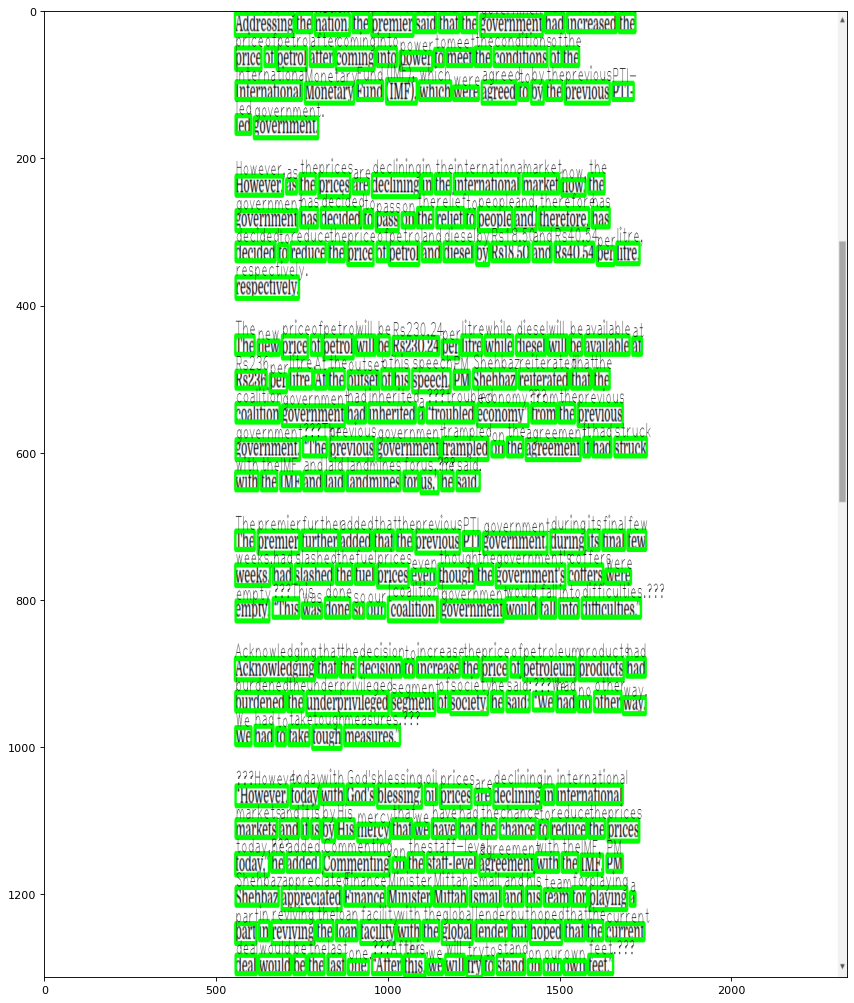

In [48]:
image = images[0]
image = np.array(image)

def drawer(inp):
    for l, x,y,w,h,c,t in df [['level', 'left', 'top', 'width', 'height', 'conf', 'text']].values:
        if l == inp:
            cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 6 )
        # putting text above the bounding boxes if found any
        if inp == 5:
            cv2.putText(image, t, (x,y), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,0), 1)

drawer(5)

plt.figure(figsize=(16, 16), dpi=80)
    
plt.imshow(image, aspect=15/7)

In [43]:
# Extract text from image
ocr_text = pytesseract.image_to_string(images[0])

In [44]:
print(ocr_text)

Addressing the nation, the premier said that the government had increased the
price of petrol after coming into power to meet the conditions of the
International Monetary Fund (IMF), which were agreed to by the previous PTI-
led government.

However, as the prices are declining in the international market now, the
government has decided to pass on the relief to people and, therefore, has
decided to reduce the price of petrol and diesel by Rs18.50 and Rs40.54 per litre,
respectively.

The new price of petrol will be Rs230.24 per litre while diesel will be available at
Rs236 per litre. At the outset of his speech, PM Shehbaz reiterated that the
coalition government had inherited a “troubled economy” from the previous
government. “The previous government trampled on the agreement it had struck
with the IMF and laid landmines for us,” he said.

The premier further added that the previous PTI government, during its final few
weeks, had slashed the fuel prices even though the government's co

In [45]:
# importing spacy to apply Named Entity Recognition
import spacy
from spacy import displacy

In [55]:
Loading the model
NER = spacy.load("en_core_web_sm")

In [56]:
# Applying NER to the extracted text
text1 = NER (ocr_text)

In [57]:
for word in text1.ents:
    print(word.text, ' : ', word.label_)

International Monetary Fund  :  ORG
PTI-  :  ORG
PM Shehbaz  :  WORK_OF_ART
IMF  :  ORG
PTI  :  ORG
today  :  DATE
today  :  DATE
IMF  :  ORG
PM
Shehbaz  :  DATE
Finance  :  ORG
Miftah Ismail  :  PERSON


In [58]:
spacy.explain('GPE')

'Countries, cities, states'

In [59]:
# rendering for better dispay and understanding
displacy.render(text1, style='ent', jupyter = True)

In [60]:
spacy.explain('GPE')

'Countries, cities, states'

## Using the same text with large trained model to see any differences in performance

In [61]:
NER = spacy.load('en_core_web_lg')

In [62]:
text2 = NER(ocr_text)

In [63]:
for word in text2.ents:
    print(word.text, ' : ', word.label_)
    

the
International Monetary Fund  :  ORG
PM Shehbaz  :  PERSON
IMF  :  ORG
PTI  :  ORG
few
weeks  :  DATE
today  :  DATE
today  :  DATE
IMF  :  ORG
Miftah Ismail  :  PERSON


In [66]:
displacy.render(text2, style='ent', jupyter=True)